#Math Grade Prediction
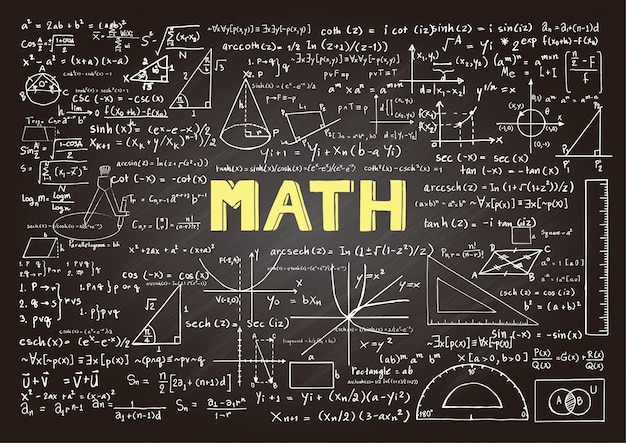

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/JRPMS 2022/student-mat.csv',delimiter = ';')

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.duplicated().sum()

0

In [8]:
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 school ['GP' 'MS']
 sex ['F' 'M']
 age [18 17 15 16 19 22 20 21]
 address ['U' 'R']
 famsize ['GT3' 'LE3']
 Pstatus ['A' 'T']
 Medu [4 1 3 2 0]
 Fedu [4 1 2 3 0]
 Mjob ['at_home' 'health' 'other' 'services' 'teacher']
 Fjob ['teacher' 'other' 'services' 'health' 'at_home']
 reason ['course' 'other' 'home' 'reputation']
 guardian ['mother' 'father' 'other']
 traveltime [2 1 3 4]
 studytime [2 3 1 4]
 failures [0 3 2 1]
 schoolsup ['yes' 'no']
 famsup ['no' 'yes']
 paid ['no' 'yes']
 activities ['no' 'yes']
 nursery ['yes' 'no']
 higher ['yes' 'no']
 internet ['no' 'yes']
 romantic ['no' 'yes']
 famrel [4 5 3 1 2]
 freetime [3 2 4 1 5]
 goout [4 3 2 1 5]
 Dalc [1 2 5 3 4]
 Walc [1 3 2 4 5]
 health [3 5 1 2 4]
 absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
 G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
 G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
 G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

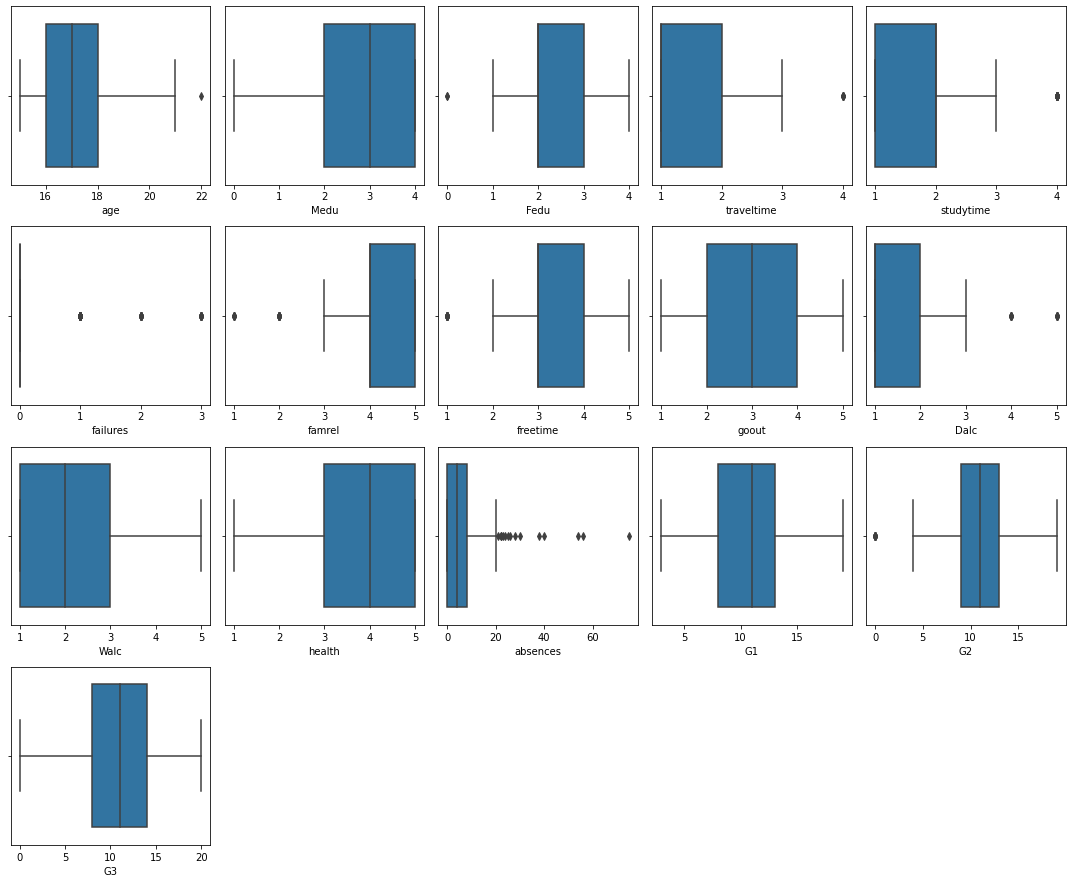

In [9]:
# outliers check using boxplot
num = df.select_dtypes('number').columns

# distribution of features
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

#Labelling Target

In [10]:
# Create new feature for distance
df['result'] = np.select([df['G3'] >= 10,
                                df['G3'] < 10],
                               [0, 1])

In [11]:
df.result.value_counts()

0    265
1    130
Name: result, dtype: int64

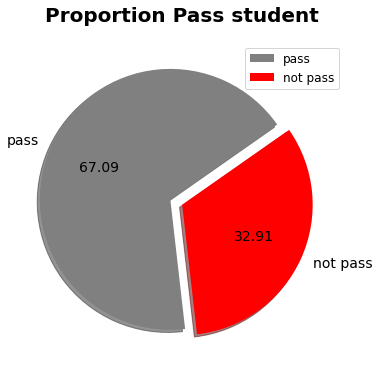

In [12]:
plt.figure(figsize=(6,6))
plt.pie(
        df["result"].value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["pass","not pass"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["gray","red"], 
        startangle=35)

plt.title("Proportion Pass student",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

#Feature Engineering

In [13]:
# One-Hot encoding using dummies
df = pd.get_dummies(df)
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
num_col = df.select_dtypes('number').columns
df[num_col] = MinMaxScaler().fit_transform(df[num_col])
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
391,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
392,0.857143,0.25,0.25,0.000000,0.000000,1.000000,1.00,1.00,0.50,0.50,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
393,0.428571,0.75,0.50,0.666667,0.000000,0.000000,0.75,0.75,0.00,0.50,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


#Sampling Dataset

In [15]:
import seaborn as sns

In [16]:
df = df.drop('G3', axis = 1)
X = df.drop('result', axis = 1)
y = df['result']

In [17]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (316, 58)
Shape of y_train (316,)
Shape of X_test (79, 58)
Shape of y_test (79,)


In [18]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 18.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.92,0.93,0.93,0.93,0.06
Perceptron,0.92,0.93,0.93,0.93,0.02
PassiveAggressiveClassifier,0.92,0.92,0.92,0.92,0.02
LinearSVC,0.91,0.91,0.91,0.91,0.06
AdaBoostClassifier,0.92,0.91,0.91,0.92,0.14
LogisticRegression,0.91,0.91,0.91,0.91,0.03
RandomForestClassifier,0.91,0.91,0.91,0.91,0.23
CalibratedClassifierCV,0.91,0.91,0.91,0.91,0.10
LGBMClassifier,0.90,0.91,0.91,0.90,0.07


In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# Fit classifier
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 99.68%
Test Accuracy : 88.61%
Precision Score : 80.0%
Recall Score : 88.89%
F1 Score : 84.21%


#Modelling

##Choose the best Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import DiscriminationThreshold 

In [23]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [24]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [25]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.94,0.87,0.87,0.86,0.92
RandomForestClassifier,0.89,0.91,0.90,0.87,0.92
AdaBoostClassifier,0.86,0.91,0.86,0.82,0.89
ExtraTreesClassifier,0.84,0.85,0.80,0.87,0.91
GradientBoostingClassifier,0.90,0.94,0.89,0.90,0.90
BaggingClassifier,0.89,0.92,0.89,0.91,0.90
KNeighborsClassifier,0.62,0.63,0.63,0.65,0.52
LogisticRegression,0.82,0.94,0.82,0.84,0.94
GaussianNB,0.75,0.85,0.76,0.78,0.80
SVC,0.70,0.78,0.70,0.76,0.76


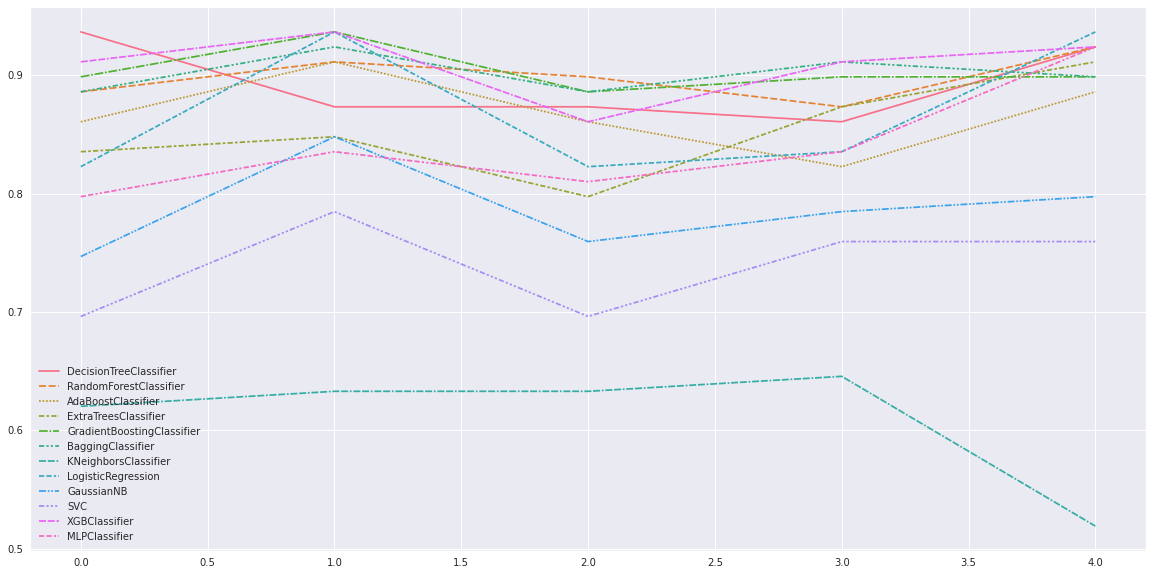

In [26]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
abc = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric='error')
rfc = RandomForestClassifier()

models = [rfc, abc, xgb]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [28]:
rfc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [29]:
# List of score per model
cv_result = [
    rfc_score, abc_score,xgb_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
RandomForestClassifier,0.90,0.90,0.89,0.89,0.92
AdaBoostClassifier,0.86,0.91,0.86,0.82,0.89
XGBClassifier,0.91,0.94,0.86,0.91,0.92


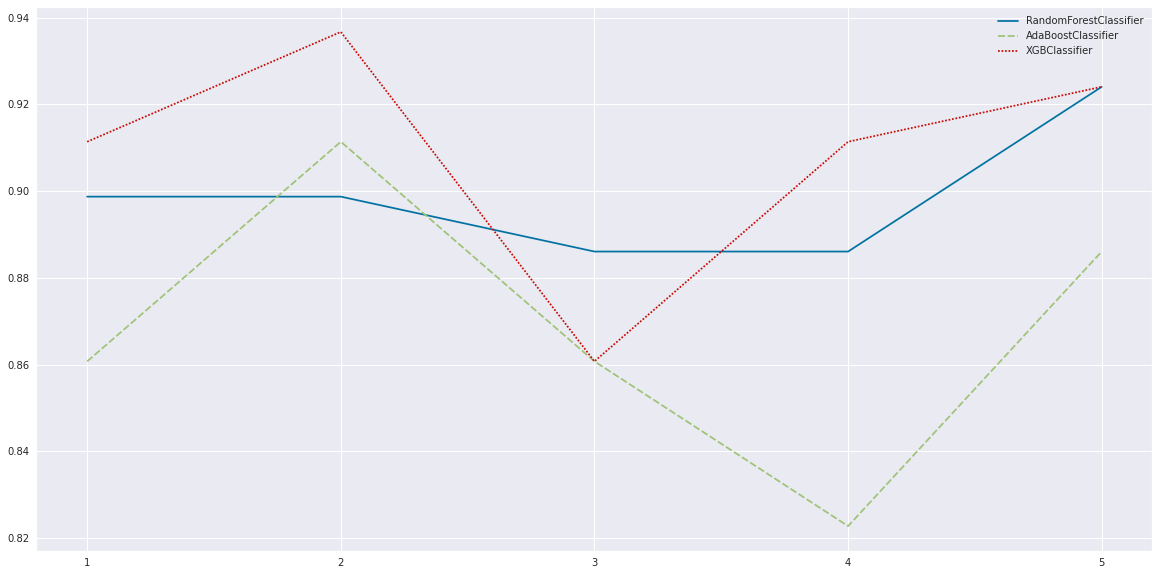

In [30]:
# Plot cross validation score
sns.set_style('darkgrid')
labelx=[1,2,3,4,5]
xi = list(range(len(labelx)))
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.xticks(xi,labelx)
plt.show()

In [31]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1
    
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1
    
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.91,0.03
RandomForestClassifier,0.90,0.01
AdaBoostClassifier,0.87,0.03


In [32]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
RandomForestClassifier,1.00,0.91,0.09
XGBClassifier,1.00,0.89,0.11
AdaBoostClassifier,0.98,0.92,0.05


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
skfold = StratifiedKFold(n_splits=5)
rfc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [34]:
cv_result = [
    rfc_score, abc_score, xgb_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result.drop(labels=['score_time','fit_time'], axis = 1)

,Model,test_accuracy,test_precision,test_recall,test_f1
0,XGBClassifier,0.91,0.86,0.87,0.86
1,RandomForestClassifier,0.89,0.85,0.81,0.83
2,AdaBoostClassifier,0.87,0.83,0.76,0.79


In [35]:
# Fit classifier
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 99.68%
Test Accuracy : 88.61%
Precision Score : 80.0%
Recall Score : 88.89%
F1 Score : 84.21%


# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
params = {
    'booster':['gbtree', 'gblinear', 'dart'],
    'use_rmm':['true','false'],
    'eta':[0.1, 0.01, 0.001, 0.0001],
    'gamma':range(0, 11, 1),
    'max_depth':range(10, 501, 5),
    'min_child_weight':range(0, 201, 5),
    'tree_method':['gpu_hist', 'auto', 'approx', 'exact', 'hist'],
    'scale_pos_weight':range(0, 91, 3),
    'max_delta_step':range(10, 301, 5),
    'max_leaves':range(0, 101, 5),
    'eval_metric':['logloss', 'error', 'auc'],
    'sampling_method':['gradient_based', 'uniform'],
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy', cv=5, 
    n_jobs=-1)

In [39]:
xgb_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.1, 0.01, 0.001, 0.0001],
                                        'eval_metric': ['logloss', 'error',
                                                        'auc'],
                                        'gamma': range(0, 11),
                                        'max_delta_step': range(10, 301, 5),
                                        'max_depth': range(10, 501, 5),
                                        'max_leaves': range(0, 101, 5),
                                        'min_child_weight': range(0, 201, 5),
                                        'sampling_method': ['gradient_based',
                                                            'uniform'],
                                        'scale_pos_weight': ran

In [41]:
# Predict test set
y_pred_tuned = xgb_tuned.predict(X_test)

#Calculate accuracy, precision, recall, and f1-score"
train_score_tuned = round((xgb_tuned.score(X_train, y_train) * 100), 2)
test_score_tuned = round((xgb_tuned.score(X_test, y_test) * 100), 2)
prec_score_tuned = round((precision_score(y_test, y_pred_tuned)) * 100, 2)
recall_score_tuned = round((recall_score(y_test, y_pred_tuned)) * 100, 2)
f1_tuned = round(f1_score(y_test, y_pred_tuned)*100, 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('Precision Score : {}%'.format(prec_score_tuned))
print('Recall Score : {}%'.format(recall_score_tuned))
print('F1 Score : {}%'.format(f1_tuned))

Training Accuracy : 92.09%
Test Accuracy : 91.14%
Precision Score : 81.25%
Recall Score : 96.3%
F1 Score : 88.14%


In [42]:
# Classification report model
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_def)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        52
         1.0       0.80      0.89      0.84        27

    accuracy                           0.89        79
   macro avg       0.87      0.89      0.88        79
weighted avg       0.89      0.89      0.89        79

